# Notebook 02: Regression Model

**Student Name:** Wendy Zhu

**Dataset:** cleaned_data.csv

**Target Variable:** 'Crop_Yield_ton_per_hectare'

**Checkpoint 3 Due:** Feb 15

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Good data scientists don't just run code—they communicate their findings clearly. Take time to write thoughtful, complete responses to all reflection prompts. This demonstrates your understanding and prepares you for real-world stakeholder communication.

---

## Setup

In [105]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Sklearn - models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 1: Load Processed Data

In [106]:
# Load cleaned data from previous notebook
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (8367, 34)


,N,P,K,Soil_pH,Soil_Moisture,Temperature,Humidity,Rainfall,Sunlight_Hours,Wind_Speed,...,Crop_Type_Maize,Crop_Type_Potato,Crop_Type_Rice,Crop_Type_Wheat,Irrigation_Type_Drip,Irrigation_Type_Rainfed,Irrigation_Type_Sprinkler,SOC_Binned_0.5,SOC_Binned_1.0,SOC_Binned_1.5
0,132,62,22,6.35,59.78,22.97,53.89,1305.68,7.73,15.96,...,1,0,0,0,0,0,0,0,0,0
1,122,71,66,5.98,25.54,17.00,76.90,1942.05,9.25,12.60,...,0,1,0,0,0,0,0,1,0,0
2,44,35,104,8.07,25.87,25.52,44.78,2216.20,8.50,15.63,...,0,0,1,0,0,1,0,1,0,0
3,101,34,42,5.84,48.01,22.74,46.27,483.47,8.00,7.44,...,0,0,0,1,0,1,0,1,0,0
4,50,29,22,6.87,32.73,13.88,68.91,1993.65,10.17,11.25,...,0,0,1,0,0,0,0,0,1,0


In [107]:
print(df.columns)

Index(['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Temperature', 'Humidity',
       'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Altitude',
       'Fertilizer_Used', 'Pesticide_Used', 'Crop_Yield_ton_per_hectare',
       'Normalize_Rainfall_by_Windspeed', 'Soil_Type_Loamy', 'Soil_Type_Sandy',
       'Soil_Type_Silt', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Season_Rabi', 'Season_Zaid', 'Crop_Type_Maize',
       'Crop_Type_Potato', 'Crop_Type_Rice', 'Crop_Type_Wheat',
       'Irrigation_Type_Drip', 'Irrigation_Type_Rainfed',
       'Irrigation_Type_Sprinkler', 'SOC_Binned_0.5', 'SOC_Binned_1.0',
       'SOC_Binned_1.5'],
      dtype='object')


In [108]:
# Define your target variable
TARGET = 'Crop_Yield_ton_per_hectare'  # <-- UPDATE THIS!

print(f"Target: {TARGET}")
print(f"\nTarget statistics:")
print(df[TARGET].describe())

# Store target range for later interpretation
target_range = df[TARGET].max() - df[TARGET].min()
target_std = df[TARGET].std()
print(f"\nTarget range: {target_range:,.2f}")
print(f"Target std: {target_std:,.2f}")

Target: Crop_Yield_ton_per_hectare

Target statistics:
count    8367.000000
mean       12.098745
std         6.663930
min         1.760000
25%         7.940000
50%         9.570000
75%        11.830000
max        30.270000
Name: Crop_Yield_ton_per_hectare, dtype: float64

Target range: 28.51
Target std: 6.66


In [109]:
print(df[TARGET].mean(), df[TARGET].median())

12.098745069917532 9.57


## Section 2: Prepare Features and Target

In [110]:
# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll features ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (8367, 33)
Target shape: (8367,)

All features (33):
['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Temperature', 'Humidity', 'Rainfall', 'Sunlight_Hours', 'Wind_Speed', 'Altitude', 'Fertilizer_Used', 'Pesticide_Used', 'Normalize_Rainfall_by_Windspeed', 'Soil_Type_Loamy', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Region_East', 'Region_North', 'Region_South', 'Region_West', 'Season_Rabi', 'Season_Zaid', 'Crop_Type_Maize', 'Crop_Type_Potato', 'Crop_Type_Rice', 'Crop_Type_Wheat', 'Irrigation_Type_Drip', 'Irrigation_Type_Rainfed', 'Irrigation_Type_Sprinkler', 'SOC_Binned_0.5', 'SOC_Binned_1.0', 'SOC_Binned_1.5']


In [111]:
# Check for any non-numeric columns that need to be handled
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print(f"Warning: Non-numeric columns found: {non_numeric}")
    print("You need to encode these or go back to Notebook 01!")
else:
    print("All features are numeric. Ready to proceed!")

All features are numeric. Ready to proceed!


## Section 3: Train-Test Split

Split your data into training and test sets. The training set is used to train the model, and the test set is used to evaluate how well it generalizes to unseen data.

In [112]:
# TODO: Split your data into training and test sets
# 
# Requirements:
# - Use an 80/20 split (test_size=0.2)
# - Set random_state=42 for reproducibility
# - Store results in: X_train, X_test, y_train, y_test
#
# Hint: Use train_test_split(X, y, ...)

# YOUR CODE HERE:
X_train, X_test, y_train, y_test = train_test_split(
    X,        # Features
    y,               # Target
    test_size=0.2,   # 20% for testing
    random_state=42  # For reproducibility
)


In [113]:
# Verify your split (run this cell to check)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set: 6,693 samples (80%)
Test set: 1,674 samples (20%)


## Section 4: Feature Scaling

Many ML algorithms perform better when features are on similar scales. StandardScaler transforms features to have mean=0 and std=1.

**Important:** Fit the scaler on training data only, then transform both train and test. This prevents data leakage.

In [114]:
# TODO: Scale your features using StandardScaler
#
# Steps:
# 1. Create a StandardScaler instance
# 2. Fit the scaler on X_train and transform X_train (use fit_transform)
# 3. Transform X_test using the same scaler (use transform only - NOT fit_transform!)
# 4. Store results in: X_train_scaled, X_test_scaled
#
# Why fit only on train? To prevent "data leakage" - test data should be truly unseen.

# YOUR CODE HERE:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training only
X_test_scaled = scaler.transform(X_test)        # Transform test (no fit!)

In [115]:
# Convert back to DataFrame for easier viewing (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling worked
print("Features scaled successfully!")
print(f"\nScaled feature means (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Scaled feature stds (should be ~1): {X_train_scaled.std().mean():.4f}")

Features scaled successfully!

Scaled feature means (should be ~0): 0.0000
Scaled feature stds (should be ~1): 1.0001


## Section 5: Baseline Model

Start with a simple Linear Regression to establish a baseline performance. This gives us a reference point for improvement.

In [116]:
# This helper function evaluates any model - you'll use it throughout this notebook
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train model and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return results, model, y_test_pred

In [117]:
# TODO: Create and evaluate a baseline Linear Regression model
#
# Steps:
# 1. Create a LinearRegression() model instance
# 2. Use the evaluate_model() function to train and evaluate it
# 3. Store the results
#
# The evaluate_model function returns: (results_dict, trained_model, predictions)

# YOUR CODE HERE:
baseline_model = LinearRegression()
baseline_model_name = 'base_LR_model'
baseline_results, baseline_trained, baseline_preds = evaluate_model(baseline_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    baseline_model_name)



In [118]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Linear Regression")
print("=" * 50)
print(f"Train R²: {baseline_results['Train R2']:.4f}")
print(f"Test R²:  {baseline_results['Test R2']:.4f}")
print(f"Test RMSE: {baseline_results['Test RMSE']:,.2f}")
print(f"Test MAE: {baseline_results['Test MAE']:,.2f}")

# Context for RMSE
print(f"\n--- RMSE in Context ---")
print(f"RMSE as % of target range: {baseline_results['Test RMSE']/target_range*100:.1f}%")
print(f"RMSE as % of target std: {baseline_results['Test RMSE']/target_std*100:.1f}%")

BASELINE MODEL: Linear Regression
Train R²: 0.9730
Test R²:  0.9746
Test RMSE: 1.09
Test MAE: 0.87

--- RMSE in Context ---
RMSE as % of target range: 3.8%
RMSE as % of target std: 16.4%


### Baseline Interpretation

*Analyze your baseline results:*

**Understanding your metrics:**
- **R² (0 to 1)**: How much variance in target is explained by features. 0.7+ is often considered good.
- **RMSE**: Average prediction error in the same units as your target. Lower is better.
- **RMSE as % of range**: Helps you understand if errors are big or small relative to your data.

**Questions to answer:**
- What does your R² score tell you about how well features explain the target?
- Is there a big gap between train and test R²? (Gap > 0.1 could indicate overfitting)
- Is your RMSE reasonable? (e.g., if predicting house prices, is a $20K error acceptable?)

**Your interpretation:**

1. This baseline model achieved Testing R2 = 0.9746. It means 97.46% of the variation in the target can be explained by the features. Or the model captured the relationship between inputs and outcome near perfectly.

2. Training R2 = 0.973, Testing R2 = 0.9746. Gap = -0.0016. It is a very small gap. There is no overfitting.

3. With RMSE at 3.8% of the target range, this baseline model's prediction error is very small.
To determine if an RMSE is reasonable or not depended on the context. For example, when predicting housing prices for high end houses (average selling price ~\\$1MM), RMSE = \\$20K is very good. But if the houses' selling prices ranged from \\$10K to \\$100K, RMSE = \\$20K indicated the model performed poorly.

## Section 6: Model Iteration

Try at least 2-3 different models to see if you can improve on the baseline.

In [119]:
# Store all results for comparison
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Linear Regression (Baseline)': baseline_trained
}

### Model 2: Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [120]:
# TODO: Create and evaluate a Ridge Regression model
#
# Create a Ridge model with alpha=1.0
# Use evaluate_model() to train and evaluate
# Add results to all_results list
# Add trained model to trained_models dict

# YOUR CODE HERE:
ridge_model = Ridge(alpha=1.0)
ridge_model_name = 'ridge_model'
ridge_results, ridge_trained, ridge_preds = evaluate_model(ridge_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    ridge_model_name)
trained_models['Ridge Model'] = ridge_trained
all_results.append(ridge_results)
# Print results
print(f"Ridge Regression - Test R²: {ridge_results['Test R2']:.4f}, Test RMSE: {ridge_results['Test RMSE']:,.2f}")

Ridge Regression - Test R²: 0.9746, Test RMSE: 1.09


### Model 3: Lasso Regression

Lasso adds L1 regularization, which can zero out unimportant features (automatic feature selection).

In [121]:
# TODO: Create and evaluate a Lasso Regression model
#
# Create a Lasso model with alpha=0.1
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:
lasso_model = Lasso(alpha=0.1)
lasso_model_name = 'lasso_model'
lasso_results, lasso_trained, lasso_preds = evaluate_model(lasso_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    lasso_model_name)

trained_models['Lasso Model'] = lasso_trained
all_results.append(lasso_results)
# Print results
print(f"Lasso Regression - Test R²: {lasso_results['Test R2']:.4f}, Test RMSE: {lasso_results['Test RMSE']:,.2f}")

# Show which features Lasso kept (non-zero coefficients)
lasso_coefs = pd.Series(lasso_trained.coef_, index=X.columns)
kept_features = lasso_coefs[lasso_coefs != 0]
print(f"\nLasso kept {len(kept_features)} of {len(X.columns)} features")

Lasso Regression - Test R²: 0.9691, Test RMSE: 1.20

Lasso kept 11 of 33 features


### Model 4: Decision Tree

In [122]:
# TODO: Create and evaluate a Decision Tree model
#
# Create a DecisionTreeRegressor with max_depth=10 and random_state=42
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model_name = 'Decision_Tree_Model'
dt_results, dt_trained, dt_preds = evaluate_model(tree_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    tree_model_name)
trained_models['Decision Tree Model'] = dt_trained
all_results.append(dt_results)
# Print results
print(f"Decision Tree - Test R²: {dt_results['Test R2']:.4f}, Test RMSE: {dt_results['Test RMSE']:,.2f}")

Decision Tree - Test R²: 0.9561, Test RMSE: 1.43


### Model 5: Random Forest

In [123]:
# TODO: Create and evaluate a Random Forest model
#
# Create a RandomForestRegressor with:
#   - n_estimators=100
#   - max_depth=10
#   - random_state=42
#   - n_jobs=-1 (use all CPU cores)
#
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model_name = 'Random_Forest_Model'
rf_results, rf_trained, rf_preds = evaluate_model(rf_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    rf_model_name)
trained_models['Random Forest Model'] = rf_trained
all_results.append(rf_results)
# Print results
print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")

Random Forest - Test R²: 0.9720, Test RMSE: 1.14


In [124]:
#!pip install xgboost

In [125]:
# YOUR ADDITIONAL MODEL HERE:
# Try GradientBoostingRegressor, different hyperparameters, etc.

import xgboost as xgb

xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.05, n_estimators=200, early_stopping=True)
xgb_model_name = 'XGB Model'

xgb_results, xgb_trained, xgb_preds = evaluate_model(xgb_model, 
                                                                    X_train_scaled, 
                                                                    X_test_scaled, 
                                                                    y_train, 
                                                                    y_test, 
                                                                    xgb_model_name)
trained_models['XGB Model'] = xgb_trained
all_results.append(xgb_results)
# Print results
print(f"XGBoost - Test R²: {xgb_results['Test R2']:.4f}, Test RMSE: {xgb_results['Test RMSE']:,.2f}")

XGBoost - Test R²: 0.9748, Test RMSE: 1.09


### Add Your Own Model (Optional)

*Feel free to try additional models or tune hyperparameters!*

## Section 7: Cross-Validation (More Robust Evaluation)

Cross-validation gives us a more reliable estimate of model performance by testing on multiple different train/test splits.

In [126]:
# Perform 5-fold cross-validation on top models
print("5-Fold Cross-Validation Results:")
print("=" * 50)

cv_results = []

models_to_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
}

for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'CV Mean R²': scores.mean(),
        'CV Std R²': scores.std()
    })
    print(f"{name}: R² = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)

5-Fold Cross-Validation Results:
Linear Regression: R² = 0.9726 (+/- 0.0027)
Ridge: R² = 0.9726 (+/- 0.0027)
Random Forest: R² = 0.9699 (+/- 0.0030)


**Why Cross-Validation Matters:**
- A model that performs well on one train/test split might just be lucky
- CV tests on 5 different splits, giving us confidence in the results
- Lower standard deviation = more consistent/reliable model

## Section 8: Model Comparison

In [127]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test R2', ascending=False)

print("Model Comparison:")
results_df

Model Comparison:


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
5,XGB Model,0.9768,0.9748,1.0081,1.0851,0.8102,0.8637
0,base_LR_model,0.9730,0.9746,1.0872,1.0901,0.8758,0.8666
1,ridge_model,0.9730,0.9746,1.0872,1.0901,0.8758,0.8666
4,Random_Forest_Model,0.9873,0.9720,0.7461,1.1449,0.5974,0.9092
2,lasso_model,0.9677,0.9691,1.1901,1.2011,0.9544,0.9544
3,Decision_Tree_Model,0.9842,0.9561,0.8310,1.4332,0.6167,1.1425


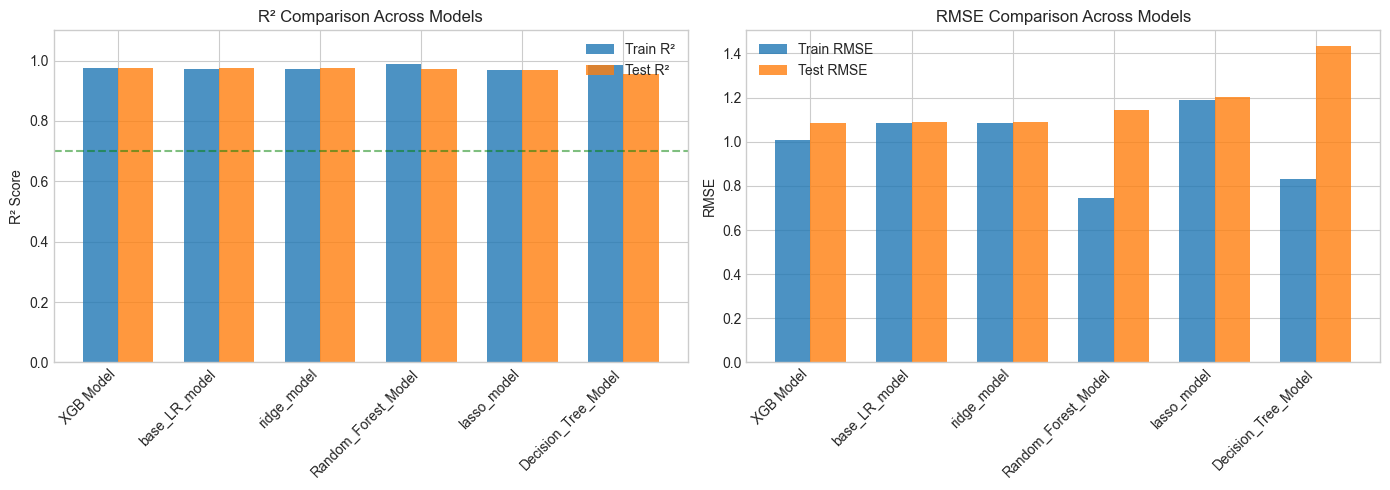

In [128]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison
models = results_df['Model']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, results_df['Train R2'], width, label='Train R²', alpha=0.8)
axes[0].bar(x + width/2, results_df['Test R2'], width, label='Test R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Comparison Across Models')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Good threshold')

# RMSE Comparison
axes[1].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1].bar(x + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison Across Models')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

### Model Iteration Reflection

*Before selecting your best model, reflect on what you learned:*

**Questions to answer:**
- Which model improved most over the baseline?
- Did any models show signs of overfitting (big train vs test gap)?
- Did regularization (Ridge/Lasso) help or hurt performance?
- Did tree-based models (Decision Tree, Random Forest) work better than linear models?

**Your reflection:**

1. Only XGB model (eXtreme Gradient Boosting) performed slightly better than the baseline.

2. When comparing R2 score, none of the 6 models had a big train vs. test gap. The highest is Decision Tree model with a 0.0281 gap, which is quite small. So overfitting is not a concern here.

3. Ridge model performed the same as baseline model (even with different alphas). Lasso regulation actually hurt the performance. It had a lower R2 and higher RMSE comparing to the base model.

4. For this regression problem, tree-based models (Decision Tree, Random Forest) did not work better than the baseline linear model.

## Section 9: Feature Importance & Selection

**Important:** Your final model should use only **4-8 features**. This section helps you identify which features matter most.

Feature Importance (Random Forest):
                            Feature  Importance
24                 Crop_Type_Potato    0.928900
11                  Fertilizer_Used    0.019208
7                          Rainfall    0.011596
23                  Crop_Type_Maize    0.008398
4                     Soil_Moisture    0.005751
25                   Crop_Type_Rice    0.005057
13  Normalize_Rainfall_by_Windspeed    0.004313
26                  Crop_Type_Wheat    0.003734
3                           Soil_pH    0.002097
0                                 N    0.001843
2                                 K    0.001500
1                                 P    0.001058
9                        Wind_Speed    0.000960
12                   Pesticide_Used    0.000953
10                         Altitude    0.000909
5                       Temperature    0.000891
8                    Sunlight_Hours    0.000858
6                          Humidity    0.000819
31                   SOC_Binned_1.0    0.000095
14  

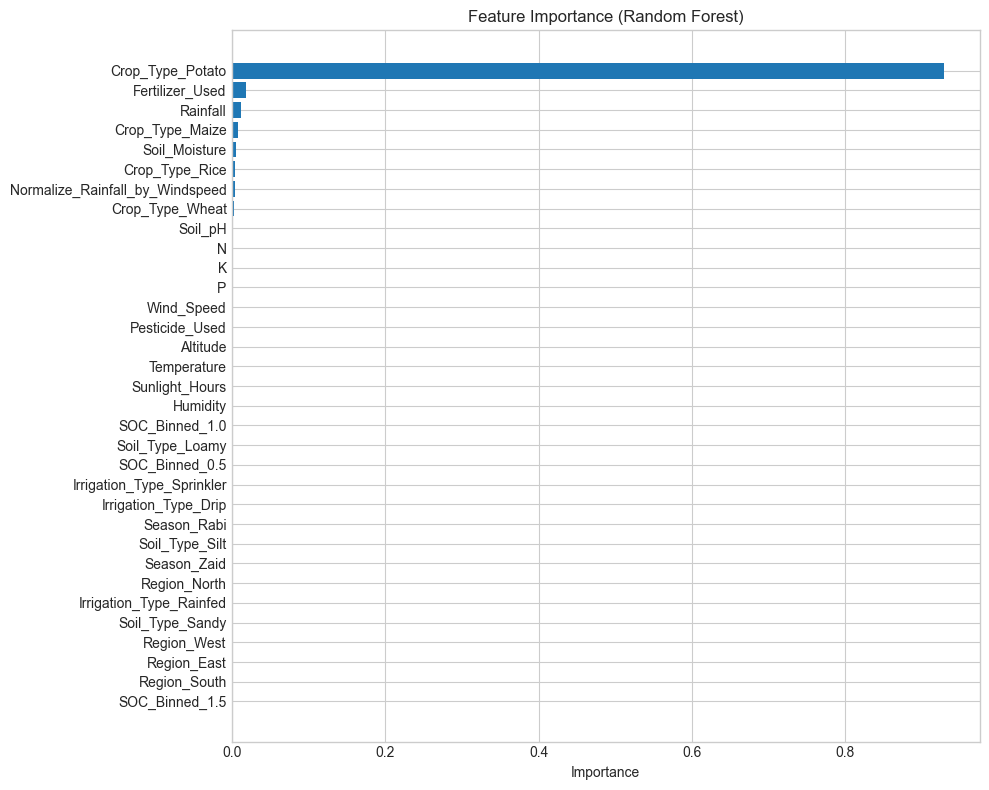

In [129]:
# Get feature importance from Random Forest (works well for this)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_trained.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'][::-1], rf_importance['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [130]:
# Also check correlations with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Absolute Correlations with Target:")
print(correlations)

Absolute Correlations with Target:
Crop_Type_Potato                   0.958002
Crop_Type_Wheat                    0.251799
Crop_Type_Rice                     0.203928
Crop_Type_Maize                    0.147851
Fertilizer_Used                    0.104356
Rainfall                           0.096242
Soil_Moisture                      0.050827
K                                  0.049472
Normalize_Rainfall_by_Windspeed    0.043829
N                                  0.034563
P                                  0.025453
SOC_Binned_0.5                     0.022339
Wind_Speed                         0.021561
Irrigation_Type_Sprinkler          0.020933
SOC_Binned_1.0                     0.015574
Altitude                           0.015394
Region_West                        0.014564
Season_Zaid                        0.014376
Soil_pH                            0.013895
Region_North                       0.010616
Region_South                       0.010123
Pesticide_Used                     0.0100

In [131]:
# TODO: Select your top features (4-8 features)
#
# Based on the importance analysis above, choose your best features.
# Consider both Random Forest importance AND correlations.
# Also think about what makes sense from a domain perspective.

SELECTED_FEATURES = [
    'Crop_Type_Potato'                   
    ,'Crop_Type_Wheat'                    
    ,'Crop_Type_Rice'                     
    ,'Crop_Type_Maize'                   
    ,'Fertilizer_Used'                    
    ,'Rainfall'                           
    ,'Soil_Moisture'                      
    ,'K'        
    ,'Normalize_Rainfall_by_Windspeed'
    ,'N'
    ,'P'
]

# Fallback if you haven't selected yet
if len(SELECTED_FEATURES) == 0:
    SELECTED_FEATURES = rf_importance['Feature'].head(8).tolist()
    print(f"Using top 8 features from Random Forest: {SELECTED_FEATURES}")
else:
    print(f"Selected features ({len(SELECTED_FEATURES)}): {SELECTED_FEATURES}")

Selected features (11): ['Crop_Type_Potato', 'Crop_Type_Wheat', 'Crop_Type_Rice', 'Crop_Type_Maize', 'Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'K', 'Normalize_Rainfall_by_Windspeed', 'N', 'P']


In [132]:
# Retrain with selected features only
X_train_selected = X_train_scaled[SELECTED_FEATURES]
X_test_selected = X_test_scaled[SELECTED_FEATURES]

print(f"Training with {len(SELECTED_FEATURES)} selected features...")

# Test a few models with selected features
selected_results = []

for name, model in [('Linear Regression', LinearRegression()),
                    ('Ridge', Ridge(alpha=1.0)),
                    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))]:
    results, trained, _ = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, name)
    selected_results.append(results)
    print(f"{name} with {len(SELECTED_FEATURES)} features - Test R²: {results['Test R2']:.4f}")

selected_df = pd.DataFrame(selected_results)

Training with 11 selected features...
Linear Regression with 11 features - Test R²: 0.9741
Ridge with 11 features - Test R²: 0.9741
Random Forest with 11 features - Test R²: 0.9716


### Feature Selection Justification

**Questions to answer:**
- Which features did you select and why?
- Did performance drop significantly with fewer features?
- Do these features make sense from a domain perspective?
- These are the features users will input in your Streamlit app—are they reasonable to ask for?

**Your justification:**

1. I chose the top 8 features from the "Absolute Correlations with Target" list. Generally the features with higher correlation with Target have higher predictive value.

2. Performance did not drop significantly. Here's comparisons before (with all features) and after (with the 8 features selected):

   
    **Linear Regression from 0.9746 before to 0.9741 after.**

   
    **Ridge from 0.9746 before to 0.9741 after.**

   
    **Random Forest from 0.9720 before to 0.9716 after.**

   
    Each dropped 0.0005 or 0.0004 in Test R2 score.

4. Yes, the 8 features we selected are ['Crop_Type', 'Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'N', 'Normalize_Rainfall_by_Windspeed', 'K', 'P']. We know that different crops had differnt weight and different growth speed. And our EDA analysis showed that "crop type" is the most influential categorical variable. For numberical variables, Fertilizer_Used, Rainfall, Soil_Moisture and N, K, P and the engineered Normalize_Rainfall_by_Windspeed are the top features that correlates to crop yield.

5. Yes. if one wants to predict crop yield, one does need to know these features: i.e., what kind of crop had been planted, the amount of fertilizer used, rainfall of the area, content of soil (N, P, K), and windspeed.
   
   

## Section 10: Best Model Selection

In [133]:
# TODO: Choose and train your final model with selected features
#
# Based on your analysis, pick the best model type and instantiate it.
# Consider: performance, consistency, simplicity
#
# Example: final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# YOUR CODE HERE:
final_model = LinearRegression()
#final_model = Ridge(alpha=1.0, random_state=42)

In [134]:
# Fit and evaluate final model
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Final metrics
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"Model: {type(final_model).__name__}")
print(f"Features: {SELECTED_FEATURES}")
print(f"\nTest R²: {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:,.2f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"\nRMSE as % of target range: {final_rmse/target_range*100:.1f}%")

FINAL MODEL PERFORMANCE
Model: LinearRegression
Features: ['Crop_Type_Potato', 'Crop_Type_Wheat', 'Crop_Type_Rice', 'Crop_Type_Maize', 'Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'K', 'Normalize_Rainfall_by_Windspeed', 'N', 'P']

Test R²: 0.9741
Test RMSE: 1.10
Test MAE: 0.87

RMSE as % of target range: 3.9%


In [135]:
y_train_pred = final_model.predict(X_train_selected)
final_train_r2 = r2_score(y_train, y_train_pred)

gap = final_train_r2 - final_r2

print(gap)

-0.0019292877284601273


### Best Model Justification

*Explain why you chose this model as your best:*

**Questions to consider:**
- Why did you select this model over others?
- Is there significant overfitting (train vs test gap)?
- How does the performance compare to your baseline?
- Would a simpler model be almost as good?
- Does the RMSE represent acceptable prediction error for your problem?

**Your justification:**

1. Although XGB model performed slightly better with all the features, when limit to only 8 features, the LinearRegression model and Ridge model had the highest testing R2_score and lowest testing RMSE.

2. The gap between training r2_score and testing r2_score was -0.0019. This is a very small number. No overfitting observed.

3. The best model picked is the baseline model.

4. This is the simplest model.

5. With RMSE within 4% of the target range, the prediction error is acceptable.

## Section 11: Best Model Analysis

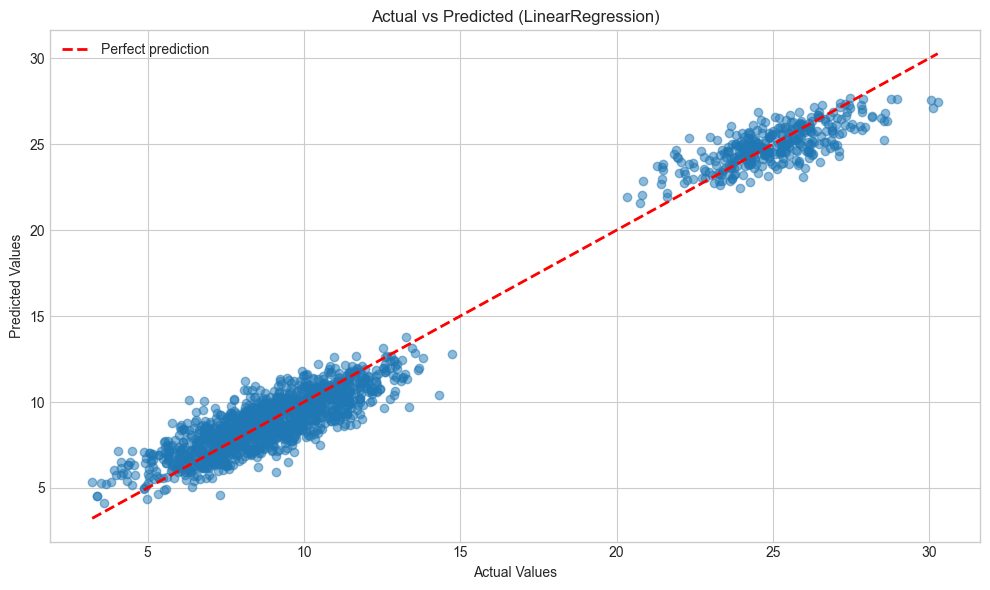

In [136]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted ({type(final_model).__name__})')
plt.legend()
plt.tight_layout()
plt.show()

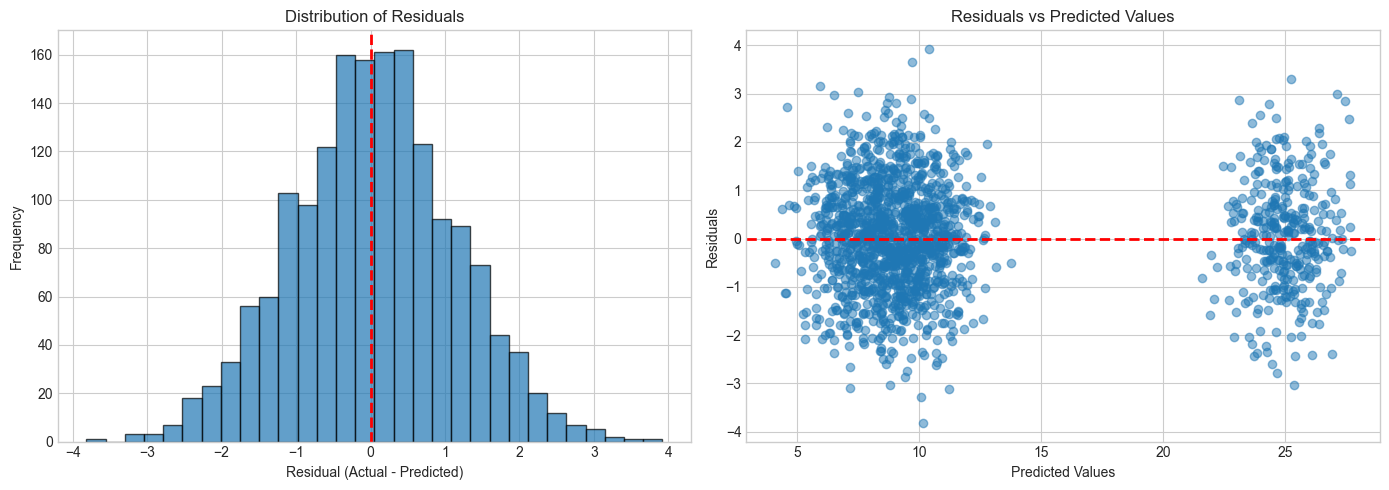

Residual mean (should be ~0): 0.04
Residual std: 1.10


In [137]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution (should be roughly normal, centered at 0)
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')

# Residuals vs Predicted (should show no pattern)
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Residual mean (should be ~0): {residuals.mean():.2f}")
print(f"Residual std: {residuals.std():,.2f}")

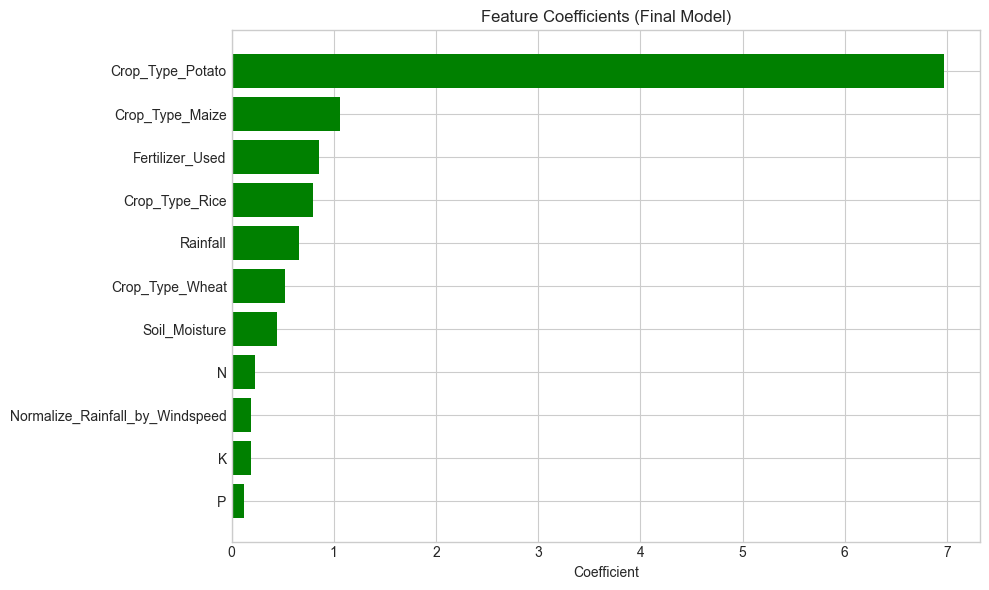

In [138]:
# Feature importance for final model (with selected features)
if hasattr(final_model, 'feature_importances_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(final_importance['Feature'], final_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance (Final Model)')
    plt.tight_layout()
    plt.show()
elif hasattr(final_model, 'coef_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in final_importance['Coefficient']]
    plt.barh(final_importance['Feature'], final_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient')
    plt.title('Feature Coefficients (Final Model)')
    plt.tight_layout()
    plt.show()

## Section 12: Save Model and Artifacts

In [139]:
# Create a new scaler fitted only on selected features
final_scaler = StandardScaler()
X_train_final = X_train[SELECTED_FEATURES]
final_scaler.fit(X_train_final)

# Save the best model
model_path = '../models/regression_model.pkl'
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on selected features only)
scaler_path = '../models/regression_scaler.pkl'
joblib.dump(final_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save feature names (the selected features for Streamlit app)
features_path = '../models/regression_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

Model saved to ../models/regression_model.pkl
Scaler saved to ../models/regression_scaler.pkl
Features saved to ../models/regression_features.pkl


In [140]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_features = joblib.load(features_path)

# Test prediction
test_sample = X_test[loaded_features].iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)

print(f"\nModel verification:")
print(f"Features used: {loaded_features}")
print(f"Sample input: {test_sample.values[0]}")
print(f"Predicted: {test_pred[0]:,.2f}")
print(f"Actual: {y_test.iloc[0]:,.2f}")
print(f"\nModel saved and verified successfully!")


Model verification:
Features used: ['Crop_Type_Potato', 'Crop_Type_Wheat', 'Crop_Type_Rice', 'Crop_Type_Maize', 'Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'K', 'Normalize_Rainfall_by_Windspeed', 'N', 'P']
Sample input: [  0.           0.           0.           1.          99.64
 463.9         38.76       148.          48.62683438 132.
  87.        ]
Predicted: 8.44
Actual: 9.07

Model saved and verified successfully!


## Section 13: Binning Strategy for Classification

**IMPORTANT:** Before you start Notebook 03, you need to send your binning strategy to Abishek on Slack for approval by **Feb 15**.

### Analyze Target Distribution

In [141]:
# Look at target distribution to help decide binning
print(f"Target: {TARGET}")
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nPercentiles:")
for p in [10, 25, 33, 50, 67, 75, 90]:
    print(f"{p}th percentile: {y.quantile(p/100):,.2f}")

Target: Crop_Yield_ton_per_hectare

Descriptive Statistics:
count    8367.000000
mean       12.098745
std         6.663930
min         1.760000
25%         7.940000
50%         9.570000
75%        11.830000
max        30.270000
Name: Crop_Yield_ton_per_hectare, dtype: float64

Percentiles:
10th percentile: 6.65
25th percentile: 7.94
33th percentile: 8.49
50th percentile: 9.57
67th percentile: 10.87
75th percentile: 11.83
90th percentile: 24.82


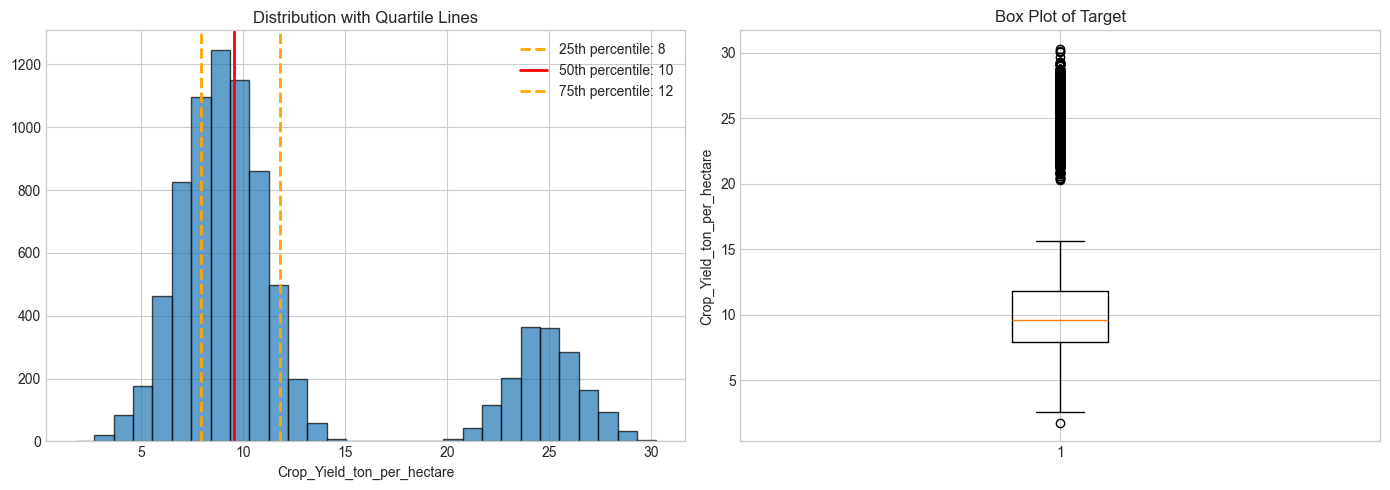

In [142]:
# Visualize potential binning strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with quartile lines
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
for p, color, style in [(25, 'orange', '--'), (50, 'red', '-'), (75, 'orange', '--')]:
    axes[0].axvline(y.quantile(p/100), color=color, linestyle=style, linewidth=2,
                     label=f'{p}th percentile: {y.quantile(p/100):,.0f}')
axes[0].set_xlabel(TARGET)
axes[0].set_title('Distribution with Quartile Lines')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel(TARGET)
axes[1].set_title('Box Plot of Target')

plt.tight_layout()
plt.show()

### Proposed Binning Strategy

*Complete this section and send to Abishek on Slack by Feb 15:*

**1. How many categories will you create?**

I will create 2 categories. "Low_yield" and "High_yield".

**2. What are your bin thresholds?**

Low_yield: Crop_Yield_ton_per_hectare <= 17, 
High_yield: Crop Yield_ton_per_hectare > 17

**3. Why does this binning make sense for your problem?**

In our EDA analysis we plotted crop yield by crop type (chart below). It demonstrated that Cotton/Wheat/Rice/Maize clustered together while Potato by itself is another cluster. Above distribution analysis also confirmed this two-cluster observation.


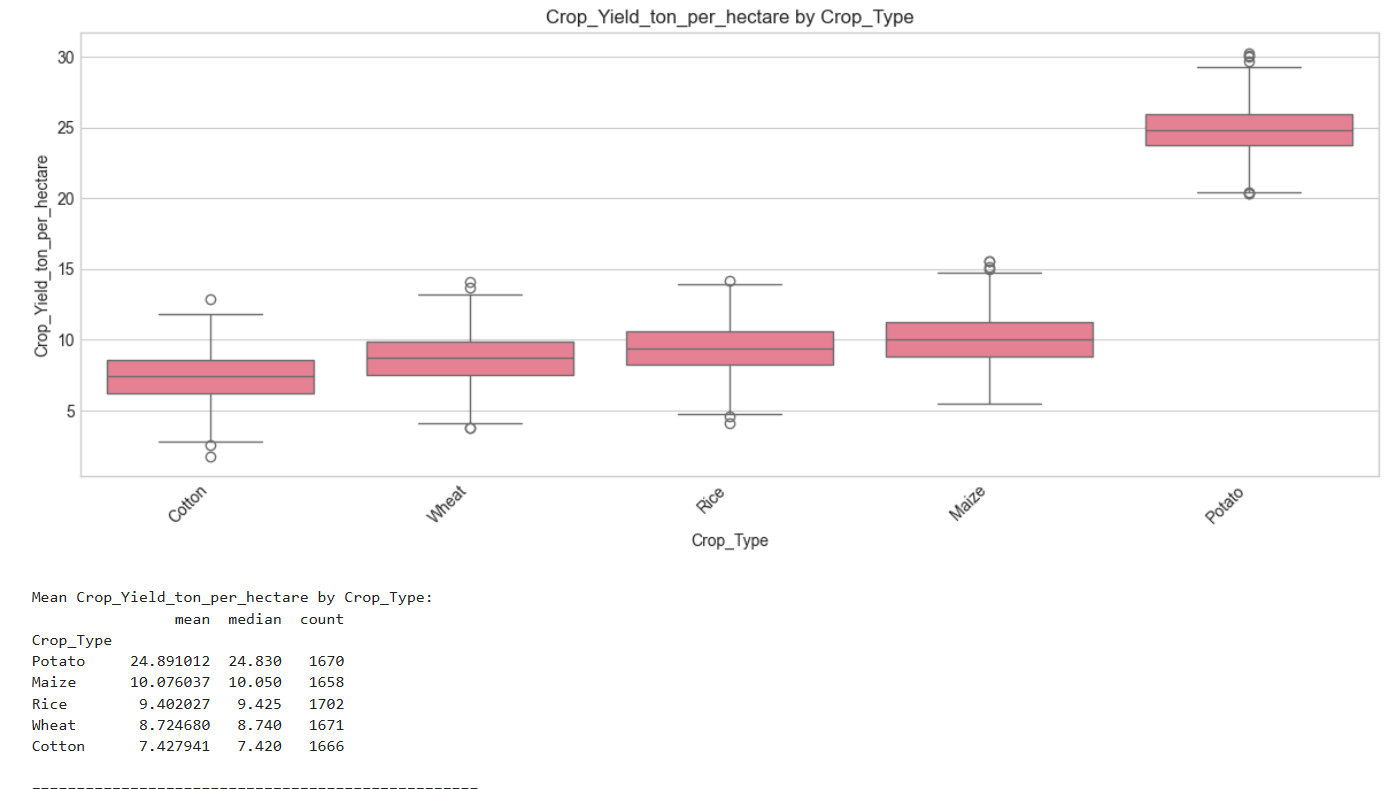


In [143]:
bin_size = 17
min_val = 0.0
max_val = 40

bins = np.arange(min_val, max_val, bin_size)
#print(bins)
labels = ['low', 'high']

y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True) 
print("Preview of binned target (using quartiles):")
print(y_binned.value_counts().sort_index())
print(f"\nPercentages:")
print((y_binned.value_counts(normalize=True) * 100).round(1).sort_index())

Preview of binned target (using quartiles):
Crop_Yield_ton_per_hectare
low     6697
high    1670
Name: count, dtype: int64

Percentages:
Crop_Yield_ton_per_hectare
low     80.0
high    20.0
Name: proportion, dtype: float64


---

## Summary

### What You Accomplished
- [ ] Loaded and prepared cleaned data
- [ ] Split data into train and test sets
- [ ] Scaled features appropriately
- [ ] Built a baseline model
- [ ] Tried multiple model types
- [ ] Performed cross-validation
- [ ] Selected top 4-8 features
- [ ] Compared and selected best model
- [ ] Analyzed model performance (residuals, feature importance)
- [ ] Saved model, scaler, and feature list
- [ ] Planned binning strategy for classification

### Key Results

**Best Model:** LinearRegression

**Selected Features:** 'Crop_Type', 'Fertilizer_Used', 'Rainfall', 'Soil_Moisture', 'N', 'Normalize_Rainfall_by_Windspeed', 'K', 'P']

**Test R²:** 0.9741

**Test RMSE:** 1.10

**Improvement over baseline:** Final model is the baseline model.

---

---

## Checkpoint 3 Submission Instructions

**Congratulations!** You've completed Checkpoint 3 (Regression Model).

### Step 1: Save This Notebook
- File -> Save (or Ctrl+S / Cmd+S)

### Step 2: Send Binning Strategy to Abishek
- Message Abishek on Slack with your binning strategy
- Include: number of categories, thresholds, and justification

### Step 3: Commit to GitHub

```bash
# Stage your changes
git add notebooks/02_regression_model.ipynb
git add models/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 3: Regression model with feature selection"

# Push to GitHub
git push
```

### Step 4: Submit to Canvas
1. Go to the Checkpoint 3 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

1. **Wait for binning approval** from Abishek
2. Move on to **Notebook 03: Classification Model**

---